# 다중분류-아이리스, 베스트모델, 조기종료

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
y_onehot = to_categorical(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습/평가

In [4]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
model = Sequential([
    Dense(12, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [14]:
mc = ModelCheckpoint('iris_best.h5py', monitor='val_loss',
                                        verbose=1, save_best_only=True)
es = EarlyStopping(patience=30)

In [15]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                            epochs=1000, batch_size=100, verbose=0,
                            callbacks=[mc, es])


Epoch 00001: val_loss improved from inf to 1.03154, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h5py\assets

Epoch 00002: val_loss improved from 1.03154 to 1.02569, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h5py\assets

Epoch 00003: val_loss improved from 1.02569 to 1.01989, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h5py\assets

Epoch 00004: val_loss improved from 1.01989 to 1.01412, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h5py\assets

Epoch 00005: val_loss improved from 1.01412 to 1.00842, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h5py\assets

Epoch 00006: val_loss improved from 1.00842 to 1.00276, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h5py\assets

Epoch 00007: val_loss improved from 1.00276 to 0.99713, saving model to iris_best.h5py
INFO:tensorflow:Assets written to: iris_best.h

In [16]:
model.evaluate(X_test, Y_test)

30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 233us/sample - loss: 0.1413 - accuracy: 0.9333


[0.14130128920078278, 0.93333334]

In [17]:
best_model = load_model('iris_best.h5py')
best_model.evaluate(X_test, Y_test)

30/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 7ms/sample - loss: 0.1413 - accuracy: 0.9333


[0.1413012593984604, 0.93333334]

In [21]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

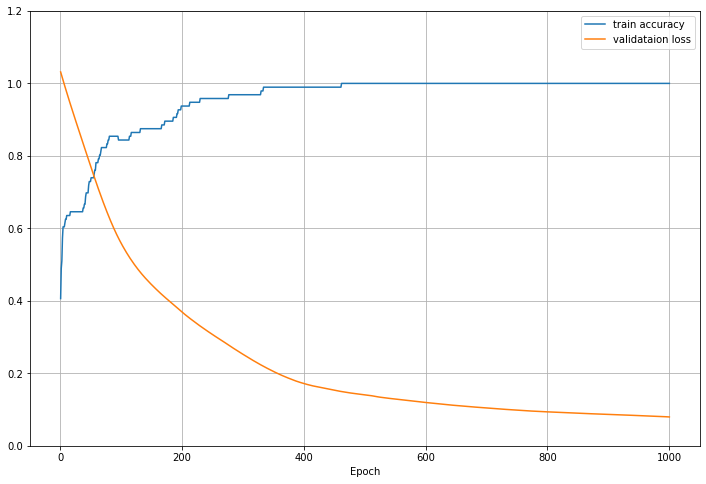

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validataion loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.2])
plt.xlabel('Epoch')
plt.show()